In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from tqdm.notebook import tqdm
import squarify


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


### About NLTK
The NLTK module is a massive tool kit, aimed at helping you with the entire Natural Language Processing (NLP) methodology.
In order to install NLTK run the following commands in your terminal.

    sudo pip install nltk
    Then, enter the python shell in your terminal by simply typing python
    Type import nltk
    nltk.download(‘all’)

The above installation will take quite some time due to the massive amount of tokenizers, chunkers, other algorithms, and all of the corpora to be downloaded.

Some terms that will be frequently used are :
* **Corpus** – Body of text, singular. Corpora is the plural of this.
* **Lexicon** – Words and their meanings.
* **Token** – Each “entity” that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is “tokenized” into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.

In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Return boolean Series denoting duplicate rows
df.duplicated().sum()

418

In [5]:
df.isna().sum().sum()

0

In [6]:
# Return DataFrame with duplicate rows removed.
df = df.drop_duplicates()

In [7]:
df = df.sample(10000, random_state=42).reset_index(drop=True)

In [8]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['sentiment'])

In [9]:
df.head()

,review,sentiment,target
0,"""Soul Plane"" is a horrible attempt at comedy t...",negative,0
1,Guest from the Future tells a fascinating stor...,positive,1
2,"""National Treasure"" (2004) is a thoroughly mis...",negative,0
3,"OK. First said, I just wanted to check whether...",negative,0
4,"I haven't always been a fan, but the show grew...",positive,1


# 1.Preprocessing
## a. Regular Expression

In [10]:
def lower_clean(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z0-9 ]','',sentence)    ### Anything except 0..9, a..z and space eplaced with nothing
    return sentence

df['token'] = df['review'].map(lower_clean).str.split()

In [11]:
df['token'].head()

0    [soul, plane, is, a, horrible, attempt, at, co...
1    [guest, from, the, future, tells, a, fascinati...
2    [national, treasure, 2004, is, a, thoroughly, ...
3    [ok, first, said, i, just, wanted, to, check, ...
4    [i, havent, always, been, a, fan, but, the, sh...
Name: token, dtype: object

## How Counter.update works?

    from collections import Counter
    c = Counter(['black','blue'])
    
    c
    Counter({'black': 1, 'blue': 1})

    c.update(["red","blue"])  

    c
    Counter({'black': 1, 'blue': 2, 'red': 1})

In [12]:
word_counter = Counter()
df['token'].map(lambda x: word_counter.update(x))
print("Total number of word:", len(word_counter))

Total number of word: 74855


Text(0.5, 1.0, 'Word Counts under q=0.99')

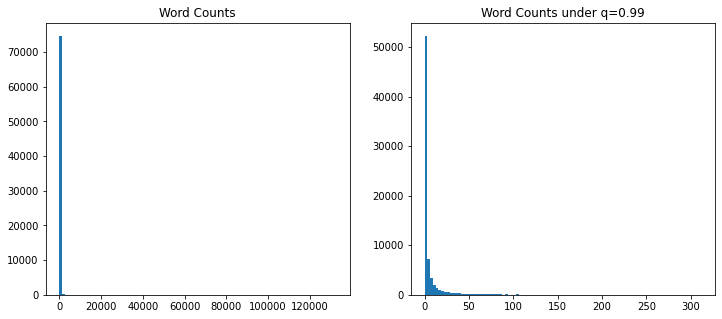

In [13]:
temp = pd.Series(word_counter.values())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(temp, bins=100)
axes[0].set_title("Word Counts")
axes[1].hist(temp, bins=100, range=[0, temp.quantile(q=0.99)])
axes[1].set_title("Word Counts under q=0.99")

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

**Tokenization of words**: We use the method word_tokenize() to split a sentence into words

### Stop Words
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
 NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. 
 
 
To check the list of stopwords you can type the following commands in the python shell.

    print(stopwords.words('english'))
    
### Lemmatization 
is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both **Stemming** as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

One major difference with stemming is that lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”


    Examples of lemmatization:

    -> rocks : rock
    -> corpora : corpus
    -> better : good

**implementation of lemmatization words using NLTK:**

        # import these modules
        from nltk.stem import WordNetLemmatizer

        lemmatizer = WordNetLemmatizer()

        print("rocks :", lemmatizer.lemmatize("rocks"))
        print("corpora :", lemmatizer.lemmatize("corpora"))

        # a denotes adjective in "pos"
        print("better :", lemmatizer.lemmatize("better", pos ="a"))


### Stemmers 
Stemming refers to the process of removing suffixes/prefixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).


<img src="https://4.bp.blogspot.com/-2TTxs_BoAzo/WYaa4tm1HcI/AAAAAAAAACc/X6GNDx1SDPESDYH7po9ycVb3WZbGAyXuwCLcBGAs/s1600/422215_orig.png" width="400">


* **Snowball Stemmer** It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer. You can also quickly check what stem would be returned for a given word or words using the snowball site. Under its demo section, you can easily see what this algorithm does for various different words.

* **Other Stemming Algorithms:**
    * **Porter Stemmer**: This is an old stemming algorithm which was developed by Martin Porter in 1980. As compared to other algorithms it is a very gentle stemming algorithm.
    * **Lancaster Stemmer**: It is the most aggressive stemming algorithm. We can also add our own custom rules in this algorithm when we implement this using the NLTK package. Since it’s aggressive it can sometimes give strange stems as well.
 
**Drawbacks of Stemming:**

Issues of over stemming and under stemming may lead to not so meaningful or inappropriate stems.
Stemming does not consider how the word is being used. For example – the word ‘saw‘ will be stemmed to ‘saw‘ itself but it won’t be considered whether the word is being used as a noun or a verb in the context. For this reason, ***Lemmatization*** is used as it keeps this fact in consideration and will return either ‘see’ or ‘saw’ depending on whether the word ‘saw’ was used as a verb or a noun.

**implementation of Snowball Stemmer words using NLTK:**
        import nltk
        from nltk.stem.snowball import SnowballStemmer

        #the stemmer requires a language parameter
        snow_stemmer = SnowballStemmer(language='english')

        #list of tokenized words
        words = ['cared','university','fairly','easily','singing',
               'sings','sung','singer','sportingly']

        #stem's of each word
        stem_words = []
        for w in words:
            x = snow_stemmer.stem(w)
            stem_words.append(x)

        #print stemming results
        for e1,e2 in zip(words,stem_words):
            print(e1+' ----> '+e2)


In [15]:
def preprocessing(sentence):
    """
    lowecase, tokenize, drop stop words
    lemmatization and stemming
    """
    sentence = sentence.lower()
    sentence = re.sub(r"<br />", "", sentence)
    sentence = re.sub(r"[^a-z0-9 ]", "", sentence) ## [a-z0-9 ] means we just want alphabetic and numeric characters and space. can select the opposite of this (i.e., anything that isn’t a word or number or whitespace) using the ^ character
    sentence = re.sub(r"\s+", " ", sentence)     ## Eliminate duplicate whitespaces using wildcards
    #Take care to always prefix patterns containing \ escapes with raw strings
    # (by adding an r in front of the string). Otherwise the \ is used as an escape sequence and the regex won’t work.
    sentence = re.sub(r"\s+", " ", sentence)     ## Eliminate duplicate whitespaces using wildcards (+ = matches 1 or more, * = 0 or more)
    tokenized = nltk.tokenize.word_tokenize(sentence)
    
    # Instead of nltk.tokenize.word_tokenize() we can use nltk.tokenize.RegexpTokenizer() 
    # With the help of NLTK tokenize.regexp() module,
    # we are able to extract the tokens from string by using 
    # regular expression with RegexpTokenizer() method.
    
    # remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    tokenized = [word for word in tokenized if word not in stop_words]
    
    # lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in tokenized]
    
    # stemming
    stemmer = nltk.stem.PorterStemmer()
    stems = [stemmer.stem(word) for word in tokenized]
    
    return sentence, tokenized, lemmas, stems

In [16]:
sentences, tokenized, lemmas, stems = [], [], [], []
for i in tqdm(range(len(df))):
    sentence_, tokenized_, lemmas_, stems_ = preprocessing(df['review'].iloc[i])
    sentences.append(sentence_)
    tokenized.append(tokenized_)
    lemmas.append(lemmas_)
    stems.append(stems_)
    

  0%|          | 0/10000 [00:00<?, ?it/s]

In [17]:
df['review'] = sentences
df['token_wo_stop'] = tokenized
df['lemma'] = lemmas
df['stem'] = stems

In [18]:
token_counter = Counter()
lemma_counter = Counter()
stem_counter = Counter()

df['token_wo_stop'].map(lambda x: token_counter.update(x))
df['lemma'].map(lambda x: lemma_counter.update(x))
df['stem'].map(lambda x: stem_counter.update(x));

In [19]:
list(map(len, [word_counter, token_counter, lemma_counter, stem_counter]))

[74855, 82627, 76347, 63249]

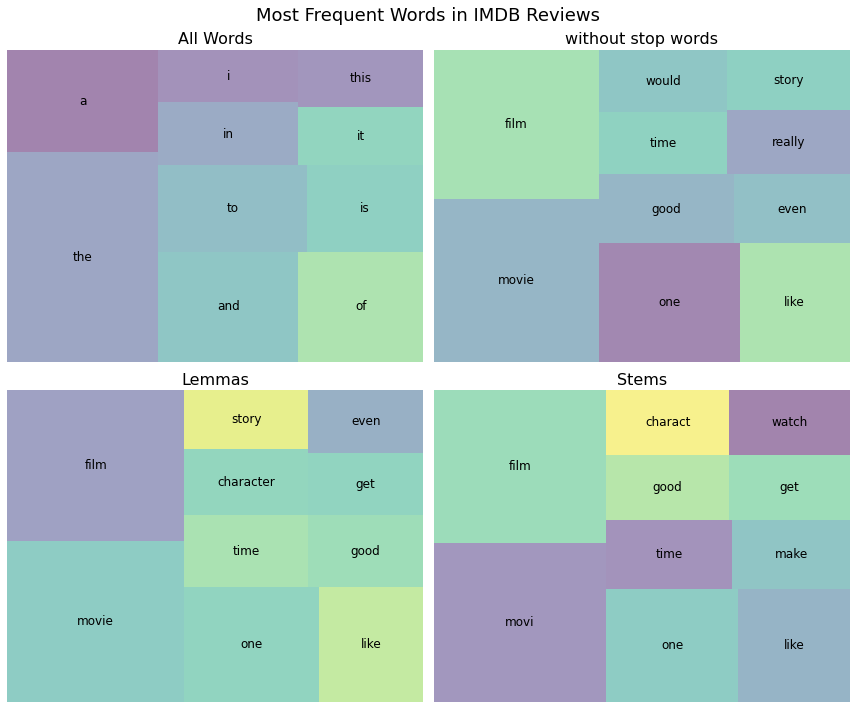

In [20]:
word_common = {k:v for k, v in word_counter.most_common(10)}
token_common = {k:v for k, v in token_counter.most_common(10)}
lemma_common = {k:v for k, v in lemma_counter.most_common(10)}
stem_common = {k:v for k, v in stem_counter.most_common(10)}

fig, axes = plt.subplots(2,2,figsize=(12,10))
for i, common in enumerate([word_common,token_common,lemma_common,stem_common]):
    squarify.plot(sizes = common.values(), label = common.keys(),
                  ax=axes[i//2, i%2], alpha=0.5, text_kwargs={'fontsize': 12})
    axes[i//2, i%2].axis('off')
    
axes[0,0].set_title("All Words", fontsize=16)
axes[0, 1].set_title("without stop words", fontsize=16)
axes[1, 0].set_title("Lemmas", fontsize=16)
axes[1, 1].set_title("Stems", fontsize=16)
plt.suptitle("Most Frequent Words in IMDB Reviews", fontsize=18)
plt.tight_layout()
plt.show()

# 2. Word Representation

## a. Count base Representation

### i. CounterVectorizer

**Convert a collection of text documents to a matrix of token counts.**
If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

BoW maps words to unique integer IDs between 1 and |V|. Each "document" in the "corpus" is then converted into a vector of |V| dimensions were in the ith component of the vector, i = wid, is simply the number of times the word w occurs in the document, i.e., we simply score each word in V by their occurrence count in the document.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
count_vectorized = count_vectorizer.fit_transform(df['review'])
count_vectorized = pd.DataFrame(count_vectorized.todense(), columns=count_vectorizer.get_feature_names_out())
count_vectorized.head()

,10,100,12,15,20,30,70s,80s,ability,able,...,year,years,yes,york,youll,young,younger,youre,youve,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0


In below code block we find six most common words in each rows of review column

In [22]:
common_word_in_rows = []
for i, row in tqdm(count_vectorized.iterrows(), total=10000):
    word_counts = {k: v for k, v in row.sort_values(ascending=False)[:6].items()}
    common_word_in_rows.append(word_counts)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [23]:
for i in range(5):
    print('Text:\n',df['review'].iloc[i][:200], '|nCommon words:\n',
         common_word_in_rows[i],'\nLabel:\n',df['sentiment'][i])

Text:
 soul plane is a horrible attempt at comedy that only should appeal people with thick skulls bloodshot eyes and furry pawns the plot is not only incoherent but also nonexistent acting is mostly sub sub |nCommon words:
 {'really': 2, 'lot': 1, 'comedy': 1, 'rent': 1, 'bad': 1, 'probably': 1} 
Label:
 negative
Text:
 guest from the future tells a fascinating story of time travel friendship battle of good and evil all with a small budget child actors and few special effects something for spielberg and lucas to lear |nCommon words:
 {'time': 3, 'evil': 2, 'like': 2, 'good': 2, 'future': 2, 'hands': 2} 
Label:
 positive
Text:
 national treasure 2004 is a thoroughly misguided hodgepodge of plot entanglements that borrow from nearly every cloak and dagger government conspiracy clich that has ever been written the film stars n |nCommon words:
 {'ben': 7, 'film': 6, 'good': 2, 'pick': 2, 'make': 2, 'meets': 2} 
Label:
 negative
Text:
 ok first said i just wanted to check whether this movi

### ii.TfidfVectorizer

TF-IDF Formula Explained
Now let’s take a look at the simple formula behind the TF-IDF statistical measure. First let’s define some notations:

* N is the number of documents we have in our dataset
* d is a given document from our dataset
* D is the collection of all documents
* w is a given word in a document

First step is to calculate the term frequency, our first measure if the score.

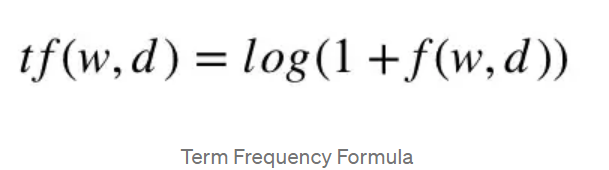

Here f(w,d) is the frequency of word w in document d.

Second step is to calculate the inverse term frequency.

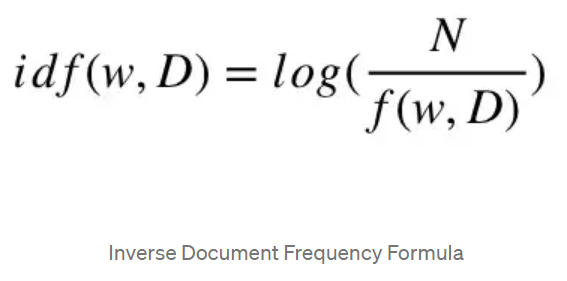

With N documents in the dataset and f(w, D) the frequency of word w in the whole dataset, this number will be lower with more appearances of the word in the whole dataset. (sklearn definition for the document frequency is the number of documents in the document set that contain the word w)

Final step is to compute the TF-IDF score by the following formula:

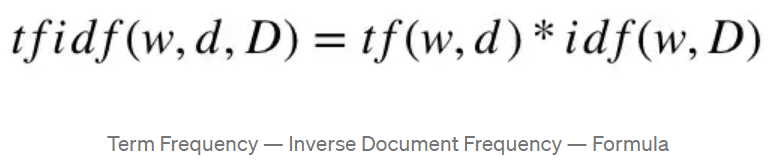

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus (collection of all documents) and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_vectorized = tfidf_vectorizer.fit_transform(df['review'])
tfidf_vectorized = pd.DataFrame(tfidf_vectorized.todense(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_vectorized.head()

,10,100,12,15,20,30,70s,80s,ability,able,...,year,years,yes,york,youll,young,younger,youre,youve,zombie
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.219424,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.139072,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.112593,...,0.000000,0.082681,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.280215,0.000000,0.072106,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.052165,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071723,0.000000,...,0.000000,0.085379,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [25]:
common_word_in_rows = []
for i, row in tqdm(tfidf_vectorized.iterrows(), total=10000):
    word_counts = {k: v for k, v in row.sort_values(ascending=False)[:6].items()}
    common_word_in_rows.append(word_counts)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [26]:
for i in range(5):
    print("Text:\n", df['review'].iloc[i][:200]+'...',
          '\nWords:\n', common_word_in_rows[i], '\nLabel:',
          df['sentiment'].iloc[i], '\n')

Text:
 soul plane is a horrible attempt at comedy that only should appeal people with thick skulls bloodshot eyes and furry pawns the plot is not only incoherent but also nonexistent acting is mostly sub sub... 
Words:
 {'amusing': 0.2714661191276634, 'hardly': 0.26179437486162627, 'rent': 0.24728819262945884, 'jokes': 0.246109722892856, 'really': 0.23440869978921994, 'attempt': 0.23010506178289805} 
Label: negative 

Text:
 guest from the future tells a fascinating story of time travel friendship battle of good and evil all with a small budget child actors and few special effects something for spielberg and lucas to lear... 
Words:
 {'hands': 0.2621802788127546, 'future': 0.2511777060415356, 'falls': 0.24721825115657362, 'evil': 0.2306909274087376, 'school': 0.2236250454338903, 'time': 0.17255974697765225} 
Label: positive 

Text:
 national treasure 2004 is a thoroughly misguided hodgepodge of plot entanglements that borrow from nearly every cloak and dagger government conspiracy clic

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

def evaluate_vectorizer(vectorized):
    X_train, X_test, y_train, y_test = train_test_split(vectorized, df['target'],
                                                        test_size=0.2, random_state=42)

    lgb_clf = LGBMClassifier()
    lgb_clf.fit(X_train, y_train)

    y_pred = lgb_clf.predict(X_test)
    print(classification_report(y_test, y_pred))

In [28]:
evaluate_vectorizer(count_vectorized)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       967
           1       0.84      0.84      0.84      1033

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [29]:
evaluate_vectorizer(tfidf_vectorized)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       967
           1       0.83      0.83      0.83      1033

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [30]:
from sklearn.neighbors import NearestNeighbors

def nearest_review(vectorized, idx):
    nn = NearestNeighbors(n_neighbors=20)
    nn.fit(vectorized.to_numpy())
    near_idx = nn.kneighbors([vectorized.iloc[idx]])[1][0]
    for i in near_idx[:5]:
        if i == idx:
            print(f"Ref review: \n{df['review'].iloc[i][:200]}...")
            print("Ref Label:", df['sentiment'].iloc[i])
        else:
            print('='*50)
            print(f"Review: \n{df['review'].iloc[i][:200]}...")
            print("Label:", df['sentiment'].iloc[i])
    return near_idx
    

In [31]:
count_vectorized_near = nearest_review(count_vectorized, 1)

Ref review: 
guest from the future tells a fascinating story of time travel friendship battle of good and evil all with a small budget child actors and few special effects something for spielberg and lucas to lear...
Ref Label: positive
Review: 
psycho criminal pure by carl schenkel who is active in hollywood like mrs soutendijk goetz george and hannes jaenicke are stealing the spectators last peace of snugness they are too able how can i get...
Label: positive
Review: 
this movie sucks ridiculous school athmosphere unbelievable students that are very bad and behave like criminals but then later after the good teacher nick nolte taught them they became as good and as...
Label: negative
Review: 
we know from other movies that the actors are good but they cannot save the movie a waste of time the premise was not too bad but one workable idea interaction between real bussinessmen and russian ma...
Label: negative
Review: 
one of the flatout drollest movies of alltime sim and rutherford ar

In [32]:
tfidf_vectorized_near = nearest_review(tfidf_vectorized, 1)

Ref review: 
guest from the future tells a fascinating story of time travel friendship battle of good and evil all with a small budget child actors and few special effects something for spielberg and lucas to lear...
Ref Label: positive
Review: 
yet another colourful excuse for men in rubber suits to wrestle with each other this time around time travellers from the future arrive in 1992 and recruit a few people to go back with them to 1944 an...
Label: negative
Review: 
spoilersi love the simpsons and i have seen every single episode that had ever come out i must admit season one is by far the most underrated season and this is the most underrated episode in season o...
Label: positive
Review: 
before the internet this movie could never have been made but the idea that the web is full of evil is the idea behind itunfortunately thats all it wasthe generally opinion that nowadays the web in th...
Label: negative
Review: 
im serious as well i mean dont get me wrong if you havent got a ben

## b. Distributed Representation

### i. Word2Vec

This section need to research ......

In [33]:
from gensim.models import Word2Vec

w2v = Word2Vec(vector_size=100,
              window=5,
              negative=10,
              sg=1)

w2v.build_vocab(df['token_wo_stop'])

In [34]:
w2v.wv.save("trained_from_imdb_review")

In [35]:
w2v.wv.most_similar(positive=['good'])

[('midwestern', 0.38072943687438965),
 ('disliked', 0.37755849957466125),
 ('alexs', 0.36581963300704956),
 ('optimism', 0.33141985535621643),
 ('unjustly', 0.3303433656692505),
 ('hope', 0.3286932408809662),
 ('ah', 0.3263862729072571),
 ('condemned', 0.3253701329231262),
 ('screenwriters', 0.31739893555641174),
 ('operate', 0.30411508679389954)]

In [36]:
w2v.wv.most_similar(positive=['bad'])

[('exams', 0.35456332564353943),
 ('diabolical', 0.3458971381187439),
 ('sliding', 0.342060387134552),
 ('joyous', 0.34137585759162903),
 ('anybody', 0.328825980424881),
 ('timing', 0.3215138912200928),
 ('rathbone', 0.3195878863334656),
 ('bowl', 0.31933265924453735),
 ('size', 0.3176019489765167),
 ('jagger', 0.3170281946659088)]

# 3. Keras Embedding Layer

* **Tokenizer**: This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

* my explanation: By default this class allocate an integer to each word and save the word and it's index in a dictionary like below:

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'this': 9,
 'i': 10,
 'that': 11,
 'was': 12,
 'as': 13,
 'for': 14,
 'door': 15}


* By using sequences_to_matrix method you can convert text to **binary,word count and tf-idf**.

    sequences_to_matrix(
        sequences, mode='binary'
    )
    mode ----> one of "binary", "count", "tfidf", "freq"
    
* **texts_to_sequences**: Transforms each text in texts to a sequence of integers. for examole a text like 'this is a door' covert to 9 6 2 15

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['target'],
                                                    test_size=0.2, random_state=42)

In [39]:
num_words =3000
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1    #  tokenizer.word_index return {'the': 1,'a': 2,'and': 3,'of': 4,'to': 5,....}

X_train_tk = tokenizer.texts_to_sequences(X_train)
X_test_tk = tokenizer.texts_to_sequences(X_test)

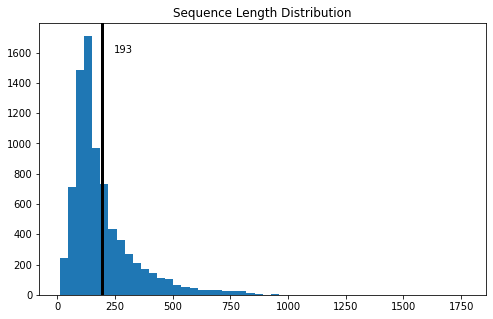

In [40]:
length_list = list(map(len, X_train_tk))

plt.figure(figsize=(8, 5))
plt.hist(length_list, bins=50)
plt.axvline(np.mean(length_list), linewidth=3, c='k')
plt.text(x=np.mean(length_list)+50, y=1600, s=int(np.mean(length_list)))
plt.title("Sequence Length Distribution")
plt.show()

Because length of each text in column of review is different we use pad_sequences to equalize length of text in each cell across coluns

In [41]:
maxlen = 300

X_train_pad = pad_sequences(X_train_tk, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_tk, maxlen=maxlen)

In [42]:
X_train_pad.shape, X_test_pad.shape

((8000, 300), (2000, 300))

In [43]:
def model():
    inputs_ = tf.keras.Input(shape=maxlen)
    embedding = tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen)(inputs_)
    average_pool = tf.keras.layers.GlobalAveragePooling1D()(embedding)
    outputs_ = tf.keras.layers.Dense(1, activation='sigmoid')(average_pool)
    model = tf.keras.Model(inputs=[inputs_], outputs=[outputs_])
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')
    return model

### Embedding layer
There are three parameters to the embedding layer

* **input_dim** : Size of the vocabulary
* **output_dim** : Length of the vector for each word
* **input_length** : Maximum length of a sequence

In the above example, we are setting 3000 as the vocabulary size, as we will be encoding numbers 0 to 2999. We want the length of the word vector to be 128, hence output_dim is set to 128. The length of the input sequence to embedding layer will be 300.

Each word  is represented by a vector of length 128. These vector (weights) are basically the vector representations of the words in vocabulary. embedding layer works like a lookup table. The words are the keys in this table, while the dense word vectors are the values. In this example the lookup table has size of 3000 x 128, for words 0 to 2999. The first word (0) is represented by first row in this table.

Once the training is completed, embedding layer has learnt the weights which are nothing but the vector representations of each word.

As model.summary() show, each sentense has output shape of (300,128)

**Why we using Embedding layer?**

Embeddings are a great way to deal with NLP problems because of two reasons. First it helps in dimensionality reduction over one-hot encoding as we can control the number of features. Second it is capable of understanding the context of a word so that similar words have similar embeddings. This is a great article explaining the working of word embeddings in detail.

In [44]:
tf.keras.backend.clear_session()
model = model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 128)          384000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 384,129
Trainable params: 384,129
Non-trainable params: 0
_________________________________________________________________


2023-01-21 15:10:57.913205: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights
# (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training
# from the state saved

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('review_classify.hdf5',
                                                   monitor='val_accuracy',
                                                   mode='max',
                                                   save_best_only=True,
                                                   save_weights_only=True)

# If we want to load model later we should set save_weights_only=False in 
# tf.keras.callbacks.ModelCheckpoint and use below command.
# new_model = tf.keras.models.load_model("/kaggle/working/review_classify.hdf5")


# EarlyStopping: Stop training when a monitored metric has stopped improving.
# patience: Number of epochs with no improvement after which training will be stopped.
earlystopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                    mode='max',
                                                    patience=5)             


model.fit(X_train_pad, y_train,
         batch_size=128,
         epochs=10,
         validation_split=0.2,
         callbacks=[checkpoint_cb, earlystopping_cb])

2023-01-21 15:10:58.114854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
50/50 [==============================] - 1s 17ms/step - loss: 0.6887 - accuracy: 0.5817 - val_loss: 0.6869 - val_accuracy: 0.5456
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.6741 - accuracy: 0.6372 - val_loss: 0.6679 - val_accuracy: 0.6881
Epoch 3/10
50/50 [==============================] - 1s 12ms/step - loss: 0.6486 - accuracy: 0.7381 - val_loss: 0.6379 - val_accuracy: 0.7619
Epoch 4/10
50/50 [==============================] - 1s 13ms/step - loss: 0.6126 - accuracy: 0.7644 - val_loss: 0.6028 - val_accuracy: 0.7694
Epoch 5/10
50/50 [==============================] - 1s 13ms/step - loss: 0.5713 - accuracy: 0.8014 - val_loss: 0.5679 - val_accuracy: 0.7575
Epoch 6/10
50/50 [==============================] - 1s 12ms/step - loss: 0.5305 - accuracy: 0.8202 - val_loss: 0.5288 - val_accuracy: 0.8056
Epoch 7/10
50/50 [==============================] - 1s 13ms/step - loss: 0.4935 - accuracy: 0.8328 - val_loss: 0.4998 - val_accuracy: 0.8106
Epoch 8/10
50